In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

#### Q1 Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [3]:
claims_data=pd.read_csv("D:\python _cs3\claims.csv")
claims_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [9]:
claims_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [10]:
claims_data['claim_date']=claims_data['claim_date'].apply(lambda x : pd.to_datetime(x, format='%m/%d/%Y')) 
claims_data.head(3).dropna(axis=0, how='all')
claims_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
cust_data=pd.read_csv("D:\python _cs3\cust_demographics.csv")
cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [12]:
cust_data.dtypes

CUST_ID         int64
gender         object
DateOfBirth    object
State          object
Contact        object
Segment        object
dtype: object

In [13]:
cust_data['DateOfBirth']=cust_data['DateOfBirth'].apply(lambda x : pd.to_datetime(x, format='%d-%b-%y')) 
cust_data.head(3).dropna(axis=0, how='all')
cust_data.loc[cust_data['DateOfBirth'].dt.year>2022, 'DateOfBirth']=cust_data.loc[cust_data['DateOfBirth'].dt.year>2022, 'DateOfBirth'].apply(lambda x : x-pd.DateOffset(years=100))
cust_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,47830476,Female,1986-05-01,MA,413-187-7945,Silver
4,19269962,Male,1977-05-13,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver


In [14]:
cust_claim_data=pd.merge(left=cust_data, right= claims_data, how='inner', left_on='CUST_ID', right_on='customer_id').drop(columns='customer_id')

In [15]:
cust_claim_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,$2840,4.0,No


In [16]:
cust_claim_data['claim_amount']=cust_claim_data['claim_amount'].str.replace('$','', regex=True).astype(float)

In [17]:
cust_claim_data.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes


#### Q4 Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [18]:
cust_claim_data['flag']= np.where(cust_claim_data['police_report']=='Unknown', 0, 1)
cust_claim_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,1
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,1
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,1
1082,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,1


#### Q5 One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [19]:
cust_claim_data.sort_values(by='claim_date', ascending =False, ignore_index=True, inplace=True)

In [20]:
recent_observsation=cust_claim_data.drop_duplicates(subset='CUST_ID', keep='last', ignore_index=True)
recent_observsation

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,1
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,1
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,1
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,1
1074,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,1
1075,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0
1076,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,1


#### Q6 Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [21]:
cust_claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float64       
 13  total_policy_claims  1075 non-nul

In [22]:
cust_claim_data['claim_amount'].mean()

12467.68137254902

In [23]:
cust_claim_data['claim_amount']=cust_claim_data['claim_amount'].fillna(cust_claim_data['claim_amount'].mean())

In [24]:
cust_claim_data['total_policy_claims'].mode()

0    1.0
Name: total_policy_claims, dtype: float64

In [25]:
cust_claim_data['total_policy_claims']=cust_claim_data['total_policy_claims'].fillna(cust_claim_data['total_policy_claims'].mode()[0])

In [26]:
cust_claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   int64         
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1085 non-null   float64       
 13  total_policy_claims  1085 non-nul

#### Q7 Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
##### Children < 18
##### Youth 18-30
##### Adult 30-60
##### Senior > 60

In [27]:
cust_claim_data['Age']=(cust_claim_data['claim_date']-cust_claim_data['DateOfBirth']).dt.days/365.25

In [28]:
cust_claim_data['Age_cat']=pd.cut(cust_claim_data['Age'], bins=(0, 18, 30, 60, 100), labels=['Children < 18', 'Youth 18-30', 'Adult 30-60', 'Senior > 60'])
cust_claim_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_cat
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,1,51.143053,Adult 30-60
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,0,42.444901,Adult 30-60
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,1,50.521561,Adult 30-60
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,1,41.505818,Adult 30-60
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,Unknown,Material only,12467.681373,2.0,No,0,32.618754,Adult 30-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,Other causes,2017-01-01,Auto,No,Material and injury,20200.000000,1.0,No,1,17.409993,Children < 18
1081,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,1,23.386721,Youth 18-30
1082,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,0,42.880219,Adult 30-60
1083,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,1,31.126626,Adult 30-60


#### Q8 What is the average amount claimed by the customers from various segments?

In [29]:
Avg_amt_claim_segm=cust_claim_data.groupby('Segment')['claim_amount'].sum()
Avg_amt_claim_segm

Segment
Gold        4.811112e+06
Platinum    4.467787e+06
Silver      4.248536e+06
Name: claim_amount, dtype: float64

#### Q9 What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [30]:
cust_claim_data.loc[cust_claim_data['claim_date']< '2018-9-10'].groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.244484e+05
Driver error          3.319952e+06
Natural causes        1.314121e+06
Other causes          3.724985e+06
Other driver error    3.318770e+06
Name: claim_amount, dtype: float64

#### Q10  How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [31]:
count_adults_driver=cust_claim_data.loc[(cust_claim_data['incident_cause'].str.lower().str.contains('driver')) & ((cust_claim_data['State']=='TX')|(cust_claim_data['State']=='DE')|(cust_claim_data['State']=='AK')), : ].groupby(['State', 'incident_cause'])['CUST_ID'].count()
count_adults_driver

State  incident_cause    
AK     Driver error           7
       Other driver error     4
DE     Driver error          10
       Other driver error     5
TX     Driver error           6
       Other driver error     4
Name: CUST_ID, dtype: int64

#### Q11 Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

In [32]:
agg_val_gen_seg = cust_claim_data.pivot_table(index='Segment', columns='gender', values= 'claim_amount', aggfunc='sum' )
agg_val_gen_seg

gender,Female,Male
Segment,,
Gold,2.109738e+06,2.701374e+06
Platinum,2.369484e+06,2.098303e+06
Silver,1.901912e+06,2.346624e+06


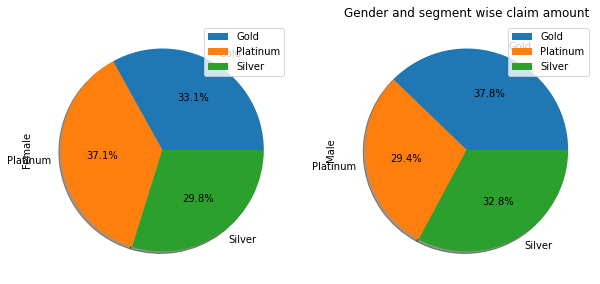

In [33]:
agg_val_gen_seg.plot(kind='pie', autopct='%.1f%%', shadow= True, subplots= True, figsize=(10,6))
plt.title('Gender and segment wise claim amount')
plt.show()

#### Q12 Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [34]:
count_gender_driver=cust_claim_data.loc[(cust_claim_data['incident_cause'].str.lower().str.contains('driver')), :].groupby(['gender'])['CUST_ID'].count()
count_gender_driver

gender
Female    222
Male      284
Name: CUST_ID, dtype: int64

In [35]:
print('Males had claimed the most for any type of driver related issues')

Males had claimed the most for any type of driver related issues


#### Q13 Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [36]:
count_Agegroup_fraud=cust_claim_data.loc[(cust_claim_data['fraudulent']=='Yes'), :].groupby(['Age_cat'])['CUST_ID'].count().reset_index()
count_Agegroup_fraud.rename(columns={'CUST_ID' : 'count_of_fraudulent'}, inplace=True)
count_Agegroup_fraud

,Age_cat,count_of_fraudulent
0,Children < 18,1
1,Youth 18-30,73
2,Adult 30-60,173
3,Senior > 60,0


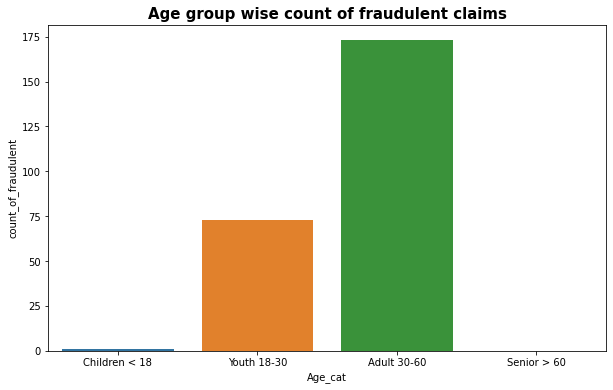

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_cat', y='count_of_fraudulent', data= count_Agegroup_fraud)
plt.title('Age group wise count of fraudulent claims', fontweight='bold', fontsize=15)
plt.show()

#### Q14 Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [38]:
cust_claim_data['Mon_year']=cust_claim_data['claim_date'].apply(lambda x: x.strftime('%b,%Y') )
cust_claim_data['claim_month']=cust_claim_data['claim_date'].apply(lambda x : x.month)
cust_claim_data['claim_year']=cust_claim_data['claim_date'].apply(lambda x : x.year)
cust_claim_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,...,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_cat,Mon_year,claim_month,claim_year
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,...,Material and injury,42124.500000,1.0,Yes,1,51.143053,Adult 30-60,"Oct,2018",10,2018
1,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,Crime,2018-10-30,Auto,...,Material only,1940.000000,1.0,No,0,42.444901,Adult 30-60,"Oct,2018",10,2018
2,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,Natural causes,2018-10-30,Auto,...,Material only,2420.000000,1.0,No,1,50.521561,Adult 30-60,"Oct,2018",10,2018
3,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,Driver error,2018-10-30,Auto,...,Material only,1830.000000,1.0,No,1,41.505818,Adult 30-60,"Oct,2018",10,2018
4,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,Other driver error,2018-10-30,Auto,...,Material only,12467.681373,2.0,No,0,32.618754,Adult 30-60,"Oct,2018",10,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,Other causes,2017-01-01,Auto,...,Material and injury,20200.000000,1.0,No,1,17.409993,Children < 18,"Jan,2017",1,2017
1081,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,Other causes,2017-01-01,Auto,...,Injury only,27670.000000,1.0,No,1,23.386721,Youth 18-30,"Jan,2017",1,2017
1082,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,Other driver error,2017-01-01,Auto,...,Material and injury,17290.000000,1.0,No,0,42.880219,Adult 30-60,"Jan,2017",1,2017
1083,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,Natural causes,2017-01-01,Auto,...,Material only,2080.000000,1.0,No,1,31.126626,Adult 30-60,"Jan,2017",1,2017


In [39]:
cust_claim_monthwise=cust_claim_data.groupby(['claim_month', 'claim_year', 'Mon_year'])['claim_amount'].sum().round(2).reset_index()
cust_claim_monthwise.sort_values(by=['claim_year', 'claim_month'], ascending=(True, True), inplace =True, ignore_index=True)
cust_claim_monthwise.drop(columns=['claim_month', 'claim_year'], inplace=True)
cust_claim_monthwise

,Mon_year,claim_amount
0,"Jan,2017",610294.04
1,"Feb,2017",633518.36
2,"Mar,2017",615508.36
3,"Apr,2017",749381.68
4,"May,2017",546639.54
5,"Jun,2017",560109.68
6,"Jul,2017",790732.73
7,"Aug,2017",431548.36
8,"Sep,2017",459230.77
9,"Oct,2017",647193.54


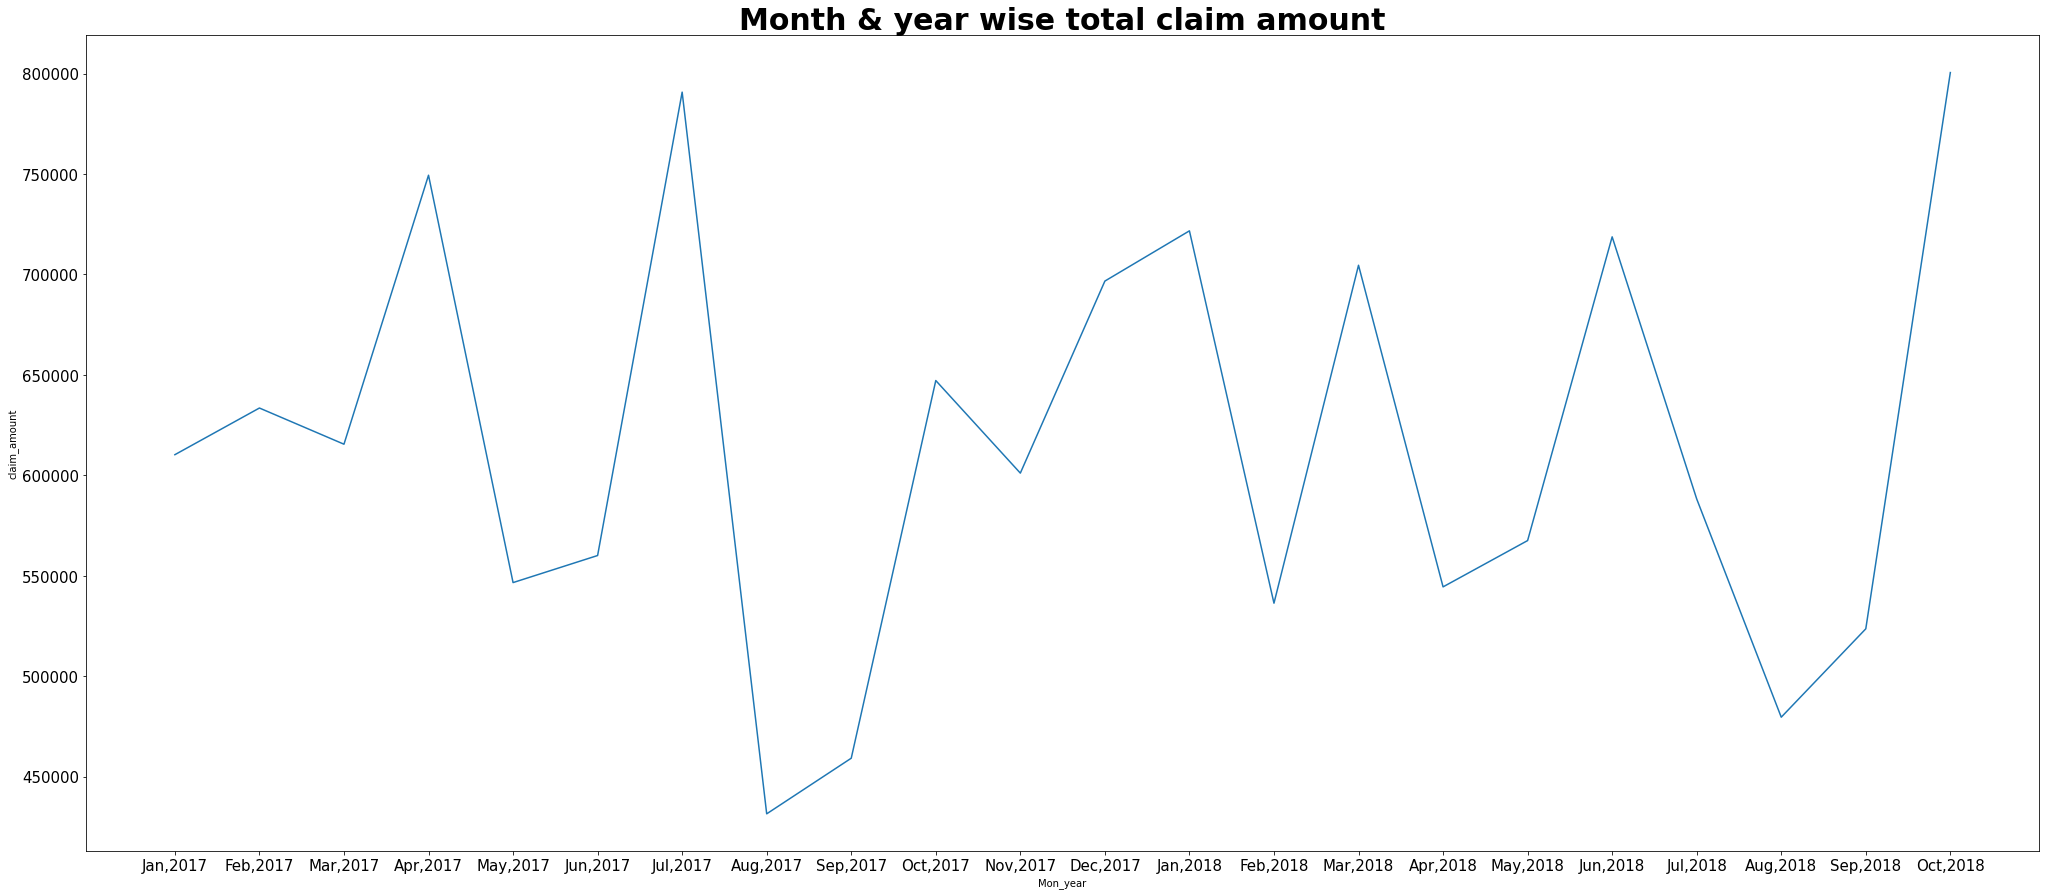

In [40]:
plt.figure(figsize=(35, 15))
sns.lineplot(x='Mon_year',y='claim_amount', data=cust_claim_monthwise)
plt.title('Month & year wise total claim amount', fontweight='bold', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Q15 What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [41]:
gen_agecat_avgamt =cust_claim_data.groupby(['gender', 'Age_cat', 'fraudulent'])['claim_amount'].mean().reset_index()
gen_agecat_avgamt.rename(columns={'claim_amount' : 'avg_claim_amount'}, inplace=True)
gen_agecat_avgamt

,gender,Age_cat,fraudulent,avg_claim_amount
0,Female,Children < 18,No,11210.000000
1,Female,Children < 18,Yes,NaN
2,Female,Youth 18-30,No,12390.372360
3,Female,Youth 18-30,Yes,7598.811819
4,Female,Adult 30-60,No,12372.094241
5,Female,Adult 30-60,Yes,12461.895425
6,Female,Senior > 60,No,NaN
7,Female,Senior > 60,Yes,NaN
8,Male,Children < 18,No,18316.000000
9,Male,Children < 18,Yes,32407.000000


In [42]:
male_fraudulent_agecat_avgamt = gen_agecat_avgamt.loc[(gen_agecat_avgamt['gender']=='Male') & (gen_agecat_avgamt['fraudulent']=='Yes'), ['Age_cat', 'avg_claim_amount']].reset_index()
male_fraudulent_agecat_avgamt.drop(columns=('index'), inplace=True)
male_fraudulent_agecat_avgamt 

,Age_cat,avg_claim_amount
0,Children < 18,32407.000000
1,Youth 18-30,10096.203895
2,Adult 30-60,17062.062958
3,Senior > 60,NaN


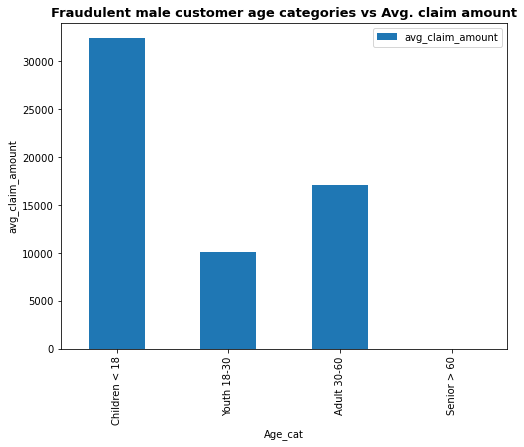

In [43]:
male_fraudulent_agecat_avgamt.plot(kind='bar', x='Age_cat', y='avg_claim_amount', figsize=(8, 6))
plt.title('Fraudulent male customer age categories vs Avg. claim amount', fontweight='bold', fontsize=13)
plt.ylabel('avg_claim_amount')
plt.show()

In [44]:
male_nonfraudulent_agecat_avgamt = gen_agecat_avgamt.loc[(gen_agecat_avgamt['gender']=='Male') & (gen_agecat_avgamt['fraudulent']=='No'), ['Age_cat', 'avg_claim_amount']].reset_index()
male_nonfraudulent_agecat_avgamt.drop(columns=('index'), inplace=True)
male_nonfraudulent_agecat_avgamt

,Age_cat,avg_claim_amount
0,Children < 18,18316.000000
1,Youth 18-30,12295.833059
2,Adult 30-60,12116.798779
3,Senior > 60,NaN


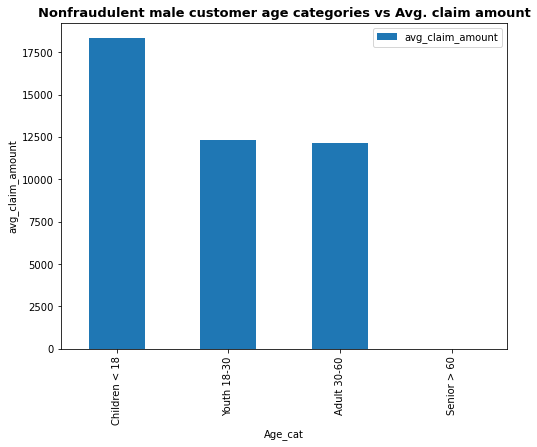

In [45]:
male_nonfraudulent_agecat_avgamt.plot(kind='bar', x='Age_cat', y='avg_claim_amount', figsize=(8, 6))
plt.title('Nonfraudulent male customer age categories vs Avg. claim amount', fontweight='bold', fontsize=13)
plt.ylabel('avg_claim_amount')
plt.show()

In [46]:
Female_fraudulent_agecat_avgamt = gen_agecat_avgamt.loc[(gen_agecat_avgamt['gender']=='Female') & (gen_agecat_avgamt['fraudulent']=='Yes'), ['Age_cat', 'avg_claim_amount']].reset_index()
Female_fraudulent_agecat_avgamt.drop(columns=('index'), inplace=True)
Female_fraudulent_agecat_avgamt

,Age_cat,avg_claim_amount
0,Children < 18,NaN
1,Youth 18-30,7598.811819
2,Adult 30-60,12461.895425
3,Senior > 60,NaN


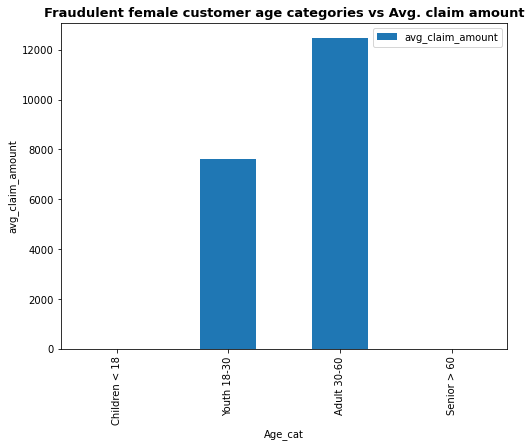

In [47]:
Female_fraudulent_agecat_avgamt.plot(kind='bar', x='Age_cat', y='avg_claim_amount', figsize=(8, 6))
plt.title('Fraudulent female customer age categories vs Avg. claim amount', fontweight='bold', fontsize=13)
plt.ylabel('avg_claim_amount')
plt.show()

In [48]:
Female_nonfraudulent_agecat_avgamt = gen_agecat_avgamt.loc[(gen_agecat_avgamt['gender']=='Female') & (gen_agecat_avgamt['fraudulent']=='No'), ['Age_cat', 'avg_claim_amount']].reset_index()
Female_nonfraudulent_agecat_avgamt.drop(columns=('index'), inplace=True)
Female_nonfraudulent_agecat_avgamt

,Age_cat,avg_claim_amount
0,Children < 18,11210.000000
1,Youth 18-30,12390.372360
2,Adult 30-60,12372.094241
3,Senior > 60,NaN


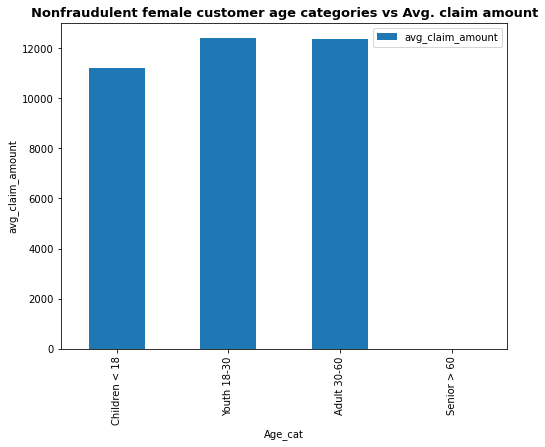

In [49]:
Female_nonfraudulent_agecat_avgamt.plot(kind='bar', x='Age_cat', y='avg_claim_amount', figsize=(8, 6))
plt.title('Nonfraudulent female customer age categories vs Avg. claim amount', fontweight='bold', fontsize=13)
plt.ylabel('avg_claim_amount')
plt.show()

#### Q16 Is there any similarity in the amount claimed by males and females?

In [50]:
female_claim_amt=cust_claim_data.loc[cust_claim_data.gender=='Female', 'claim_amount']
female_claim_amt.mean()

12062.634706623672

In [51]:
male_claim_amt=cust_claim_data.loc[cust_claim_data.gender=='Male', 'claim_amount']
male_claim_amt.mean()

12853.058506136276

**i. H0:**
           There is no similarity in the amount claimed by males and female
           
   **ii. Ha:**
           There is similarity in the amount claimed by males and female
   
   **iii. CI = 95%**
      pvalue = 0.05
       
   **iv. Perform ttest :**

In [52]:
stats.ttest_ind(female_claim_amt, male_claim_amt)

Ttest_indResult(statistic=-0.9738138415066818, pvalue=0.33036643165116597)

**v. Business Conclusion:**
* Since P_new(0.330) > PVALUE(0.05)
* We accept the null hypopthesis
            There is no similarity in the amount claimed by males and females

#### Q17 Is there any relationship between age category and segment?

**i. H0:**
           There is no relationship between age category and segment
           
   **ii. Ha:**
            There is relationship between age category and segment  
        
   **iii. CI = 95%**
      pvalue = 0.05
       
   **iv. Perform Chisquare test :**

In [53]:
observ_table=pd.crosstab(index=cust_claim_data.Age_cat, columns= cust_claim_data.Segment)
observ_table

Segment,Gold,Platinum,Silver
Age_cat,,,
Children < 18,4,4,0
Youth 18-30,106,117,105
Adult 30-60,265,241,243


In [54]:
stats.chi2_contingency(observ_table)

(5.276713250756647,
 0.26006478076298034,
 4,
 array([[  2.76497696,   2.66912442,   2.56589862],
        [113.3640553 , 109.43410138, 105.20184332],
        [258.87096774, 249.89677419, 240.23225806]]))

**v. Business Conclusion:**
* Since P_new(0.26006) > PVALUE(0.05)
* We accept the null hypopthesis
            there is no realtionship between age category and segment

#### Q18 The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [55]:
cust_claim_2017_18=cust_claim_data.loc[(cust_claim_data.claim_date >='2017-01-01') & (cust_claim_data.claim_date <='2017-12-31'), 'claim_amount']
cust_claim_2017_18.mean()

12277.550372155554

**i. H0:**
           Avg_claim_amt_2016-17 > Avg_claim_amt_2017-18
           
   **ii. Ha:**
           Avg_claim_amt_2016-17 < Avg_claim_amt_2017-18   
        
   **iii. CI = 95%**
      pvalue = 0.05
       
   **iv. Perform ttest :**

In [56]:
stats.ttest_1samp(cust_claim_2017_18, 10000)

Ttest_1sampResult(statistic=4.195278754700451, pvalue=3.1395187382733834e-05)

**v. Business Conclusion:**
* Since P_new(3.1395e^-5) < PVALUE(0.05)
* We reject the null hypopthesis

    The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal year

 #### Q19 Is there any difference between age groups and insurance claims?

In [57]:
cust_claim_data.Age_cat.value_counts()

Adult 30-60      749
Youth 18-30      328
Children < 18      8
Senior > 60        0
Name: Age_cat, dtype: int64

In [58]:
claim_adult=cust_claim_data.loc[cust_claim_data.Age_cat== 'Adult 30-60', 'claim_amount']
claim_adult.mean()

12798.642163407429

In [59]:
claim_youth=cust_claim_data.loc[cust_claim_data.Age_cat== 'Youth 18-30', 'claim_amount']
claim_youth.mean()

11569.647282998561

In [60]:
claim_children=cust_claim_data.loc[cust_claim_data.Age_cat== 'Children < 18', 'claim_amount']
claim_children.mean()

18300.875

In [61]:
claim_senior=cust_claim_data.loc[cust_claim_data.Age_cat== 'Senior > 60', 'claim_amount']
claim_senior

Series([], Name: claim_amount, dtype: float64)

**i. H0:**
           There is no difference in claim amount of different age category
           
   **ii. Ha:**
           There is difference in claim amount of different age category   
        
   **iii. CI = 95%**
      pvalue = 0.05
       
   **iv. Perform ttest :**

In [62]:
stats.f_oneway(claim_adult, claim_youth, claim_children)

F_onewayResult(statistic=1.7347645227432509, pvalue=0.17693212120060886)

**v. Business Conclusion:**

* Since P_new(0.1769) > PVALUE(0.05)
* We fail to reject the null hypopthesis 

#### Q20 Is there any relationship between total number of policy claims and the claimed amount?

In [63]:
cust_claim_data.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,...,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_cat,Mon_year,claim_month,claim_year
0,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,Other causes,2018-10-30,Auto,...,Material and injury,42124.5,1.0,Yes,1,51.143053,Adult 30-60,"Oct,2018",10,2018


**i. H0:**
           There is no relationship between total number of policy claims and the claimed amount 
           
   **ii. Ha:**
           There is relationship between total number of policy claims and the claimed amount
   
   **iii. CI = 95%**
      pvalue = 0.05
       
   **iv. Perform pearson correlation:**

In [64]:
stats.pearsonr(cust_claim_data.total_policy_claims, cust_claim_data.claim_amount)

(-0.017952953318902988, 0.5547051246400856)

**v. Business Conclusion:**

* Since P_new(0.55) > PVALUE(0.05)
* We accept the null hypopthesis 
                There is no relationship between total number of policy claims and the claimed amount
             